# The use of axes

Axes are a great option to define at the simulation declaration in order to make a variable v evolves in a given interval.

We'll show this opportunity with the illustration of the evolution of average rate and marginal rate of the French Income Tax.

#### Initialisation

We import essential modules and initialize the tax and benefit system


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from openfisca_france import FranceTaxBenefitSystem
from openfisca_france.scenarios import init_single_entity

tax_benefit_system = FranceTaxBenefitSystem()  # Create an instance of French Tax and Benefit system

libyaml is not installed in your environment. This can make OpenFisca slower to start. Once you have installed libyaml, run 'pip uninstall pyyaml && pip install pyyaml --no-cache-dir' so that it is used in your Python environment.



## Income Tax Concavity : a progressive system ?

Let's observe how to declare a simulation with an income (`salaire_de_base`) evolving between 0 euros and 100000 euros per year.

In [3]:
scenario = init_single_entity(
    tax_benefit_system.new_scenario(),
    
    # Axe declaration
    axes = [[
        dict(                       #  in a dictionary
            count = 100,            # 'count' : indicates the number of step
            min = 0,
            max = 100000,
            name = 'salaire_de_base', # the variable you want to make evolve
            ),
        ]],
    
    period = 2014,
    parent1 = dict(
        date_naissance = '1980-01-01',
    )
)

simulation = scenario.new_simulation()

In [4]:
simulation.calculate_add('salaire_de_base', 2014)

array([     0.     ,   1010.10114,   2020.2023 ,   3030.3027 ,
         4040.4045 ,   5050.5054 ,   6060.6055 ,   7070.707  ,
         8080.809  ,   9090.909  ,  10101.011  ,  11111.11   ,
        12121.211  ,  13131.315  ,  14141.414  ,  15151.515  ,
        16161.618  ,  17171.717  ,  18181.818  ,  19191.918  ,
        20202.021  ,  21212.121  ,  22222.22   ,  23232.326  ,
        24242.422  ,  25252.525  ,  26262.63   ,  27272.725  ,
        28282.828  ,  29292.932  ,  30303.03   ,  31313.13   ,
        32323.236  ,  33333.332  ,  34343.434  ,  35353.54   ,
        36363.637  ,  37373.74   ,  38383.836  ,  39393.938  ,
        40404.043  ,  41414.14   ,  42424.242  ,  43434.344  ,
        44444.44   ,  45454.547  ,  46464.652  ,  47474.75   ,
        48484.844  ,  49494.94   ,  50505.05   ,  51515.152  ,
        52525.26   ,  53535.363  ,  54545.45   ,  55555.55   ,
        56565.656  ,  57575.76   ,  58585.863  ,  59595.953  ,
        60606.06   ,  61616.16   ,  62626.26   ,  63636

In [5]:
income_tax = - simulation.calculate('irpp', 2014)
gross_wage = simulation.calculate_add('salaire_de_base', 2014)
taxable_income = simulation.calculate_add('salaire_imposable', 2014)


Text(0.5, 0, 'Gross Wage')

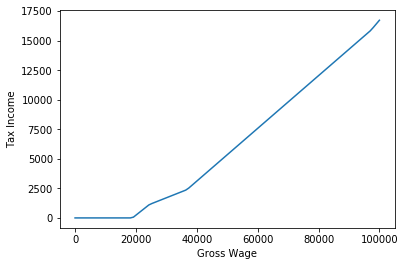

In [6]:
plt.plot(gross_wage,income_tax)
plt.ylabel(u"Tax Income")
plt.xlabel(u"Gross Wage")

**NB** : The Income Tax is flat in opposite to common opinion.

## Average rate

In [7]:
average_rate = income_tax / gross_wage
# the 1st value of gross_wage is zero, so there's a warning

/Users/sch/.local/share/virtualenvs/tut78/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Gross Wage')

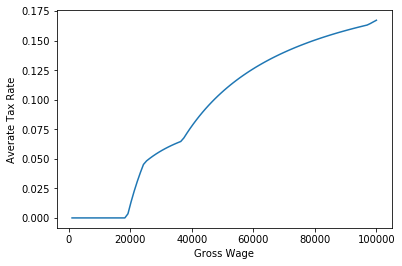

In [8]:
plt.plot(gross_wage, average_rate)
plt.ylabel("Averate Tax Rate")
plt.xlabel("Gross Wage")

## Marginal rate

In [9]:
marginal_rate =  (income_tax[:-1] - income_tax[1:]) / (taxable_income[:-1] - taxable_income[1:] ) 

Text(0.5, 0, 'Gross Wage')

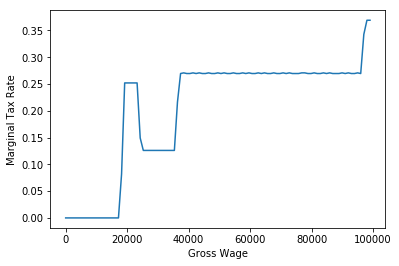

In [10]:
plt.plot(gross_wage[:-1], marginal_rate)
plt.ylabel("Marginal Tax Rate")
plt.xlabel("Gross Wage")

In [11]:
marginal_rate[25], marginal_rate[90]

(0.12598455, 0.26954177)

We can see the step in the French Tax scale of 14% and 30% (applied after a 10% deduction on the taxable income) 

### Notice :  dedicated fonctions in OpenFisca

Marginal and Average rate exist as functions implemented in OpenFisca. You can apply them on several income concept

In [12]:
from openfisca_core.rates import average_rate, marginal_rate

In [13]:
csg = simulation.calculate_add('csg', period = 2014)
csg

array([    0.      ,   -74.434586,  -148.86015 ,  -223.29471 ,
        -297.7293  ,  -372.15488 ,  -446.58942 ,  -521.024   ,
        -595.4586  ,  -669.8843  ,  -744.3187  ,  -818.7533  ,
        -893.17883 ,  -967.61346 , -1042.048   , -1116.4736  ,
       -1190.9083  , -1265.3428  , -1339.7686  , -1414.203   ,
       -1488.6375  , -1563.072   , -1637.4978  , -1711.9324  ,
       -1786.367   , -1860.7925  , -1935.2269  , -2009.6617  ,
       -2084.0872  , -2158.5217  , -2232.9565  , -2307.3813  ,
       -2381.8167  , -2456.2505  , -2530.6855  , -2605.1108  ,
       -2679.5457  , -2753.9802  , -2828.406   , -2902.84    ,
       -2977.275   , -3051.7007  , -3126.1353  , -3200.5698  ,
       -3275.0044  , -3349.4302  , -3423.8647  , -3498.2988  ,
       -3572.724   , -3647.1592  , -3721.5942  , -3796.019   ,
       -3870.4539  , -3944.8887  , -4019.3145  , -4093.7483  ,
       -4168.183   , -4242.618   , -4317.0435  , -4391.4775  ,
       -4465.913   , -4540.339   , -4614.773   , -4689.

In [14]:
1 - average_rate(-csg[1:], gross_wage[1:])

array([0.07369024, 0.07368577, 0.07368726, 0.07368797, 0.07368666,
       0.07368726, 0.07368767, 0.07368797, 0.07368726, 0.07368755,
       0.07368779, 0.07368726, 0.07368749, 0.07368767, 0.07368726,
       0.07368743, 0.07368761, 0.07368726, 0.07368743, 0.07368755,
       0.07368767, 0.07368743, 0.07368749, 0.07368767, 0.07368737,
       0.07368749, 0.07368761, 0.07368737, 0.07368743, 0.07368755,
       0.07368731, 0.07368743, 0.07368749, 0.07368761, 0.07368743,
       0.07368749, 0.07368755, 0.07368743, 0.07368749, 0.07368755,
       0.07368743, 0.07368749, 0.07368755, 0.07368761, 0.07368743,
       0.07368749, 0.07368755, 0.07368743, 0.07368749, 0.07368755,
       0.07368743, 0.07368749, 0.07368755, 0.07368743, 0.07368749,
       0.07368755, 0.07368755, 0.07368743, 0.07368749, 0.07368755,
       0.07368749, 0.07368749, 0.07368755, 0.07368743, 0.07368749,
       0.07368749, 0.07368743, 0.07368749, 0.07368749, 0.07368755,
       0.07368749, 0.07368749, 0.07368755, 0.07368743, 0.07368

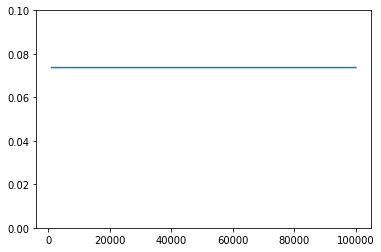

In [15]:
plt.ylim(0,0.1)
plt.plot(gross_wage[1:], 1-average_rate(-csg[1:], gross_wage[1:]))